# EDA for engineers salary dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('data.csv')

In [16]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,645000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,310000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,455000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,620000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,400000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [18]:
df['CollegeCityTier'].unique()

array([1, 0], dtype=int64)

In [19]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [20]:
df['Degree'].value_counts()

Degree
B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: count, dtype: int64

In [21]:
df=df[df['Degree']!='M.Sc. (Tech.)']
df['Degree'].value_counts()

Degree
B.Tech/B.E.     2757
MCA              200
M.Tech./M.E.      40
Name: count, dtype: int64

In [22]:
df['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [23]:
## A lot of specializations, grouping those with less instances in others category
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
electronics and instrumentation engineering     18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and a

In [48]:
df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState'
                                     ,'CollegeCityID', 'CollegeCityTier'
                                         ,'GraduationYear'], axis = 1, inplace = True)
df.head()


KeyError: "['ID', 'DOB', 'CollegeID', '12graduation', '10board', '12board', 'CollegeState', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear'] not found in axis"

In [25]:
specialization=df['Specialization'].value_counts(ascending=False)
lessthan10=specialization[specialization<10]
lessthan10

Specialization
industrial & production engineering        8
chemical engineering                       7
mechanical and automation                  5
applied electronics and instrumentation    5
telecommunication engineering              4
automobile/automotive engineering          4
computer science and technology            4
instrumentation engineering                3
mechatronics                               3
electronics and computer engineering       3
aeronautical engineering                   3
biomedical engineering                     2
metallurgical engineering                  2
industrial engineering                     2
computer networking                        1
computer and communication engineering     1
control and instrumentation engineering    1
mechanical & production engineering        1
industrial & management engineering        1
electrical and power engineering           1
ceramic engineering                        1
embedded systems technology             

In [26]:
def remove_specialization(x):
    if x in lessthan10:
        return 'Others'
    else:
        return x

testdf=df
testdf.Specialization=df.Specialization.apply(remove_specialization)    
testdf['Specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'Others',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering',
       'other'], dtype=object)

In [27]:
testdf['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          65
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
Name: count, dtype: int64

In [28]:
df=testdf

In [29]:
df['collegeGPA'].value_counts()

collegeGPA
72.00    85
70.00    75
75.00    67
65.00    63
76.00    57
         ..
78.36     1
72.25     1
65.47     1
72.90     1
73.19     1
Name: count, Length: 1064, dtype: int64

C:\Users\avira\AppData\Local\Temp\ipykernel_15148\1995436470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['collegeGPA'], bins=30)


<Axes: xlabel='collegeGPA', ylabel='Density'>

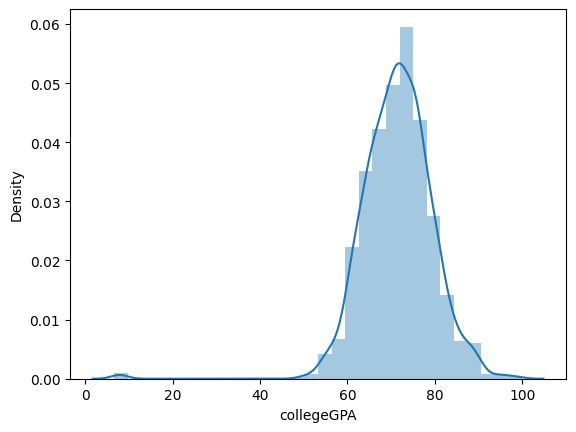

In [30]:
# Plotting the distribution of collegeGPA
sns.distplot(df['collegeGPA'], bins=30)

In [31]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,...,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2.997000e+03
mean,77.667821,74.350117,1.924925,71.506623,501.051718,500.395062,514.122456,0.508961,351.817484,96.260594,...,24.147147,16.273607,31.079079,1.947948,-0.038626,0.127133,-0.008001,-0.145639,-0.140679,5.051231e+05
std,10.004091,11.111092,0.263556,8.121888,105.319025,87.291461,122.212473,0.462630,204.541220,158.754296,...,99.800733,86.068521,103.568586,32.246836,1.025134,0.954674,0.962176,1.012913,1.007024,2.123478e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,2.350000e+05
25%,71.130000,66.000000,2.000000,66.520000,425.000000,440.000000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,3.800000e+05
50%,79.000000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,5.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.837621,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,5.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.200000e+06


C:\Users\avira\AppData\Local\Temp\ipykernel_15148\2073384530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'], bins=30)


<Axes: xlabel='Salary', ylabel='Density'>

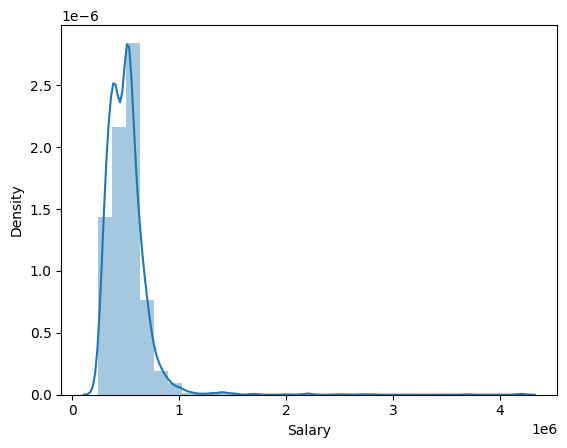

In [32]:
sns.distplot(df['Salary'], bins=30)

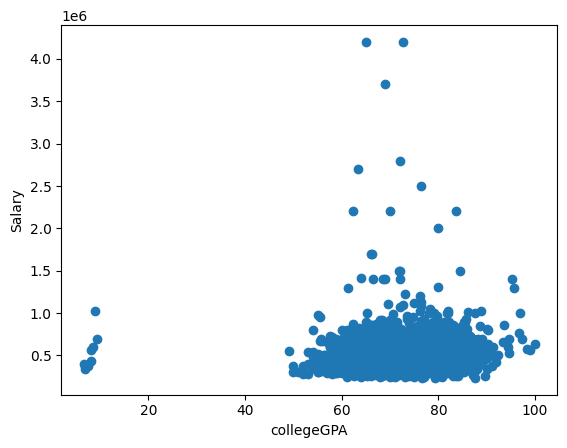

In [33]:
# PLotting scatter plot of salary and GPA with labels for x and y axis
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.scatter(df['collegeGPA'], df['Salary'])

C:\Users\avira\AppData\Local\Temp\ipykernel_15148\2521570382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['12percentage'])


<Axes: xlabel='12percentage', ylabel='Density'>

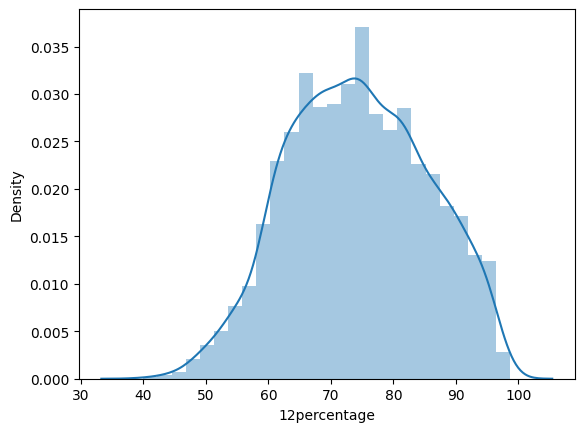

In [34]:
sns.distplot(df['12percentage'])

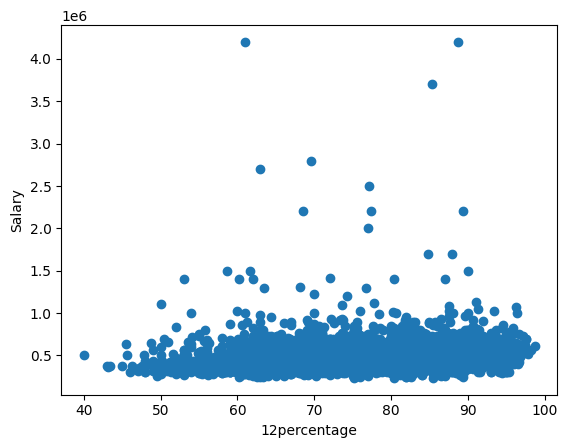

In [35]:
plt.xlabel('12percentage')
plt.ylabel('Salary')
plt.scatter(df['12percentage'], df['Salary'])

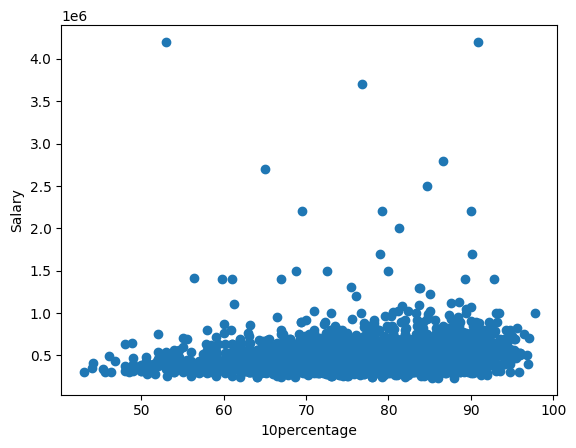

In [36]:
plt.xlabel('10percentage')
plt.ylabel('Salary')
plt.scatter(df['10percentage'], df['Salary'])

In [37]:
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          65
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
Name: count, dtype: int64

In [38]:

# Grouping computer science and IT specializations
def group_specialization(x):
    if x in ['computer engineering', 'computer science & engineering', 'information technology','computer application']:
        return 'CS/IT'
    else:
        return x
    
df.Specialization=df.Specialization.apply(group_specialization)
df['Specialization'].value_counts()

Specialization
CS/IT                                          1679
electronics and communication engineering       670
mechanical engineering                          155
electronics and electrical engineering          148
electronics & telecommunications                 89
Others                                           65
electrical engineering                           63
electronics & instrumentation eng                24
instrumentation and control engineering          18
information science engineering                  18
electronics and instrumentation engineering      18
civil engineering                                15
electronics engineering                          13
biotechnology                                    12
other                                            10
Name: count, dtype: int64

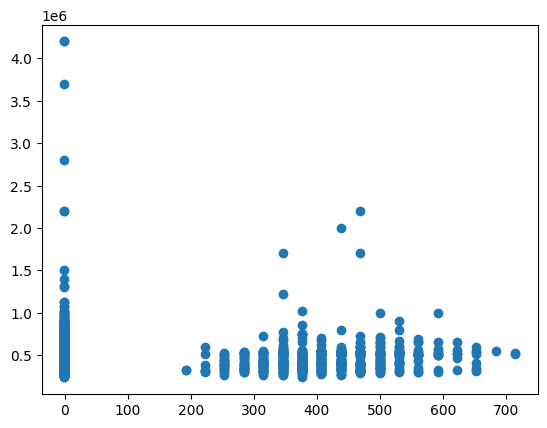

In [39]:
csitdf=df[df['Specialization']=='CS/IT']
plt.scatter(csitdf['ComputerScience'], csitdf['Salary'])

<Axes: xlabel='ComputerProgramming', ylabel='Salary'>

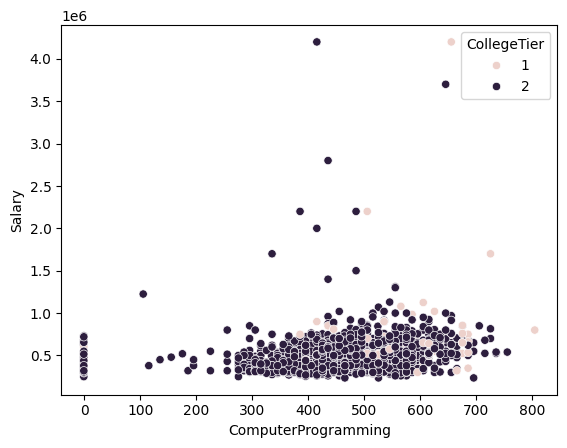

In [40]:
# Computer Programming score vs Salary
sns.scatterplot(x='ComputerProgramming', y='Salary', data=csitdf,hue='CollegeTier')

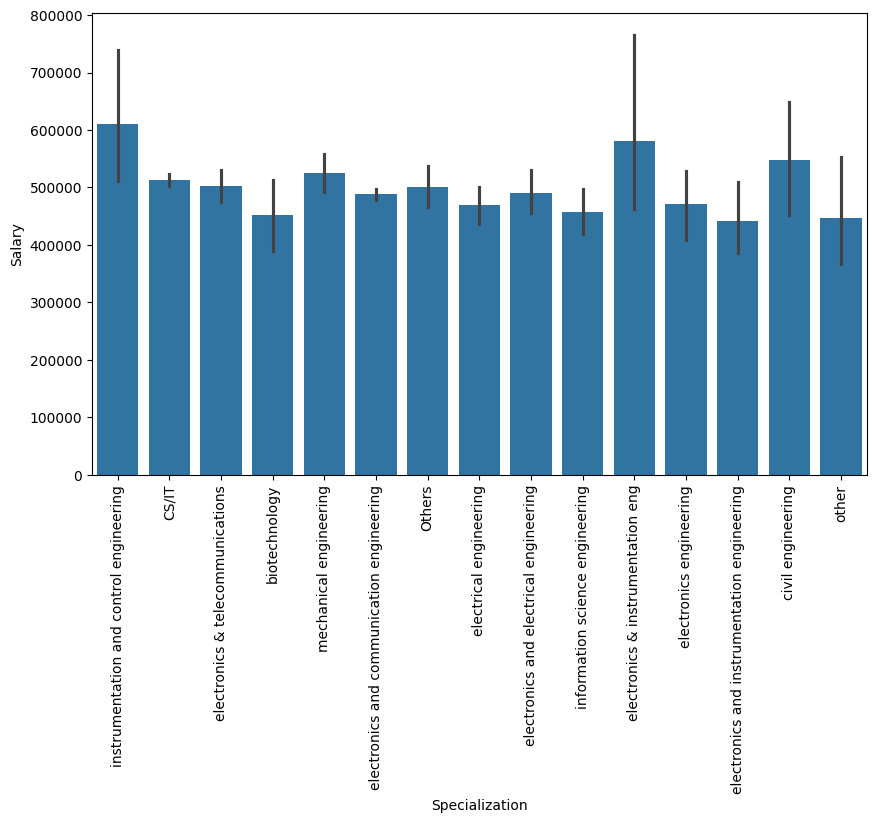

In [41]:
# Plotting the distribution of salary for all specializations and rotating the x axis labels, with salary in descending order
plt.figure(figsize=(10,6))
sns.barplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.show() 

ValueError: num must be an integer with 1 <= num <= 16, not 17

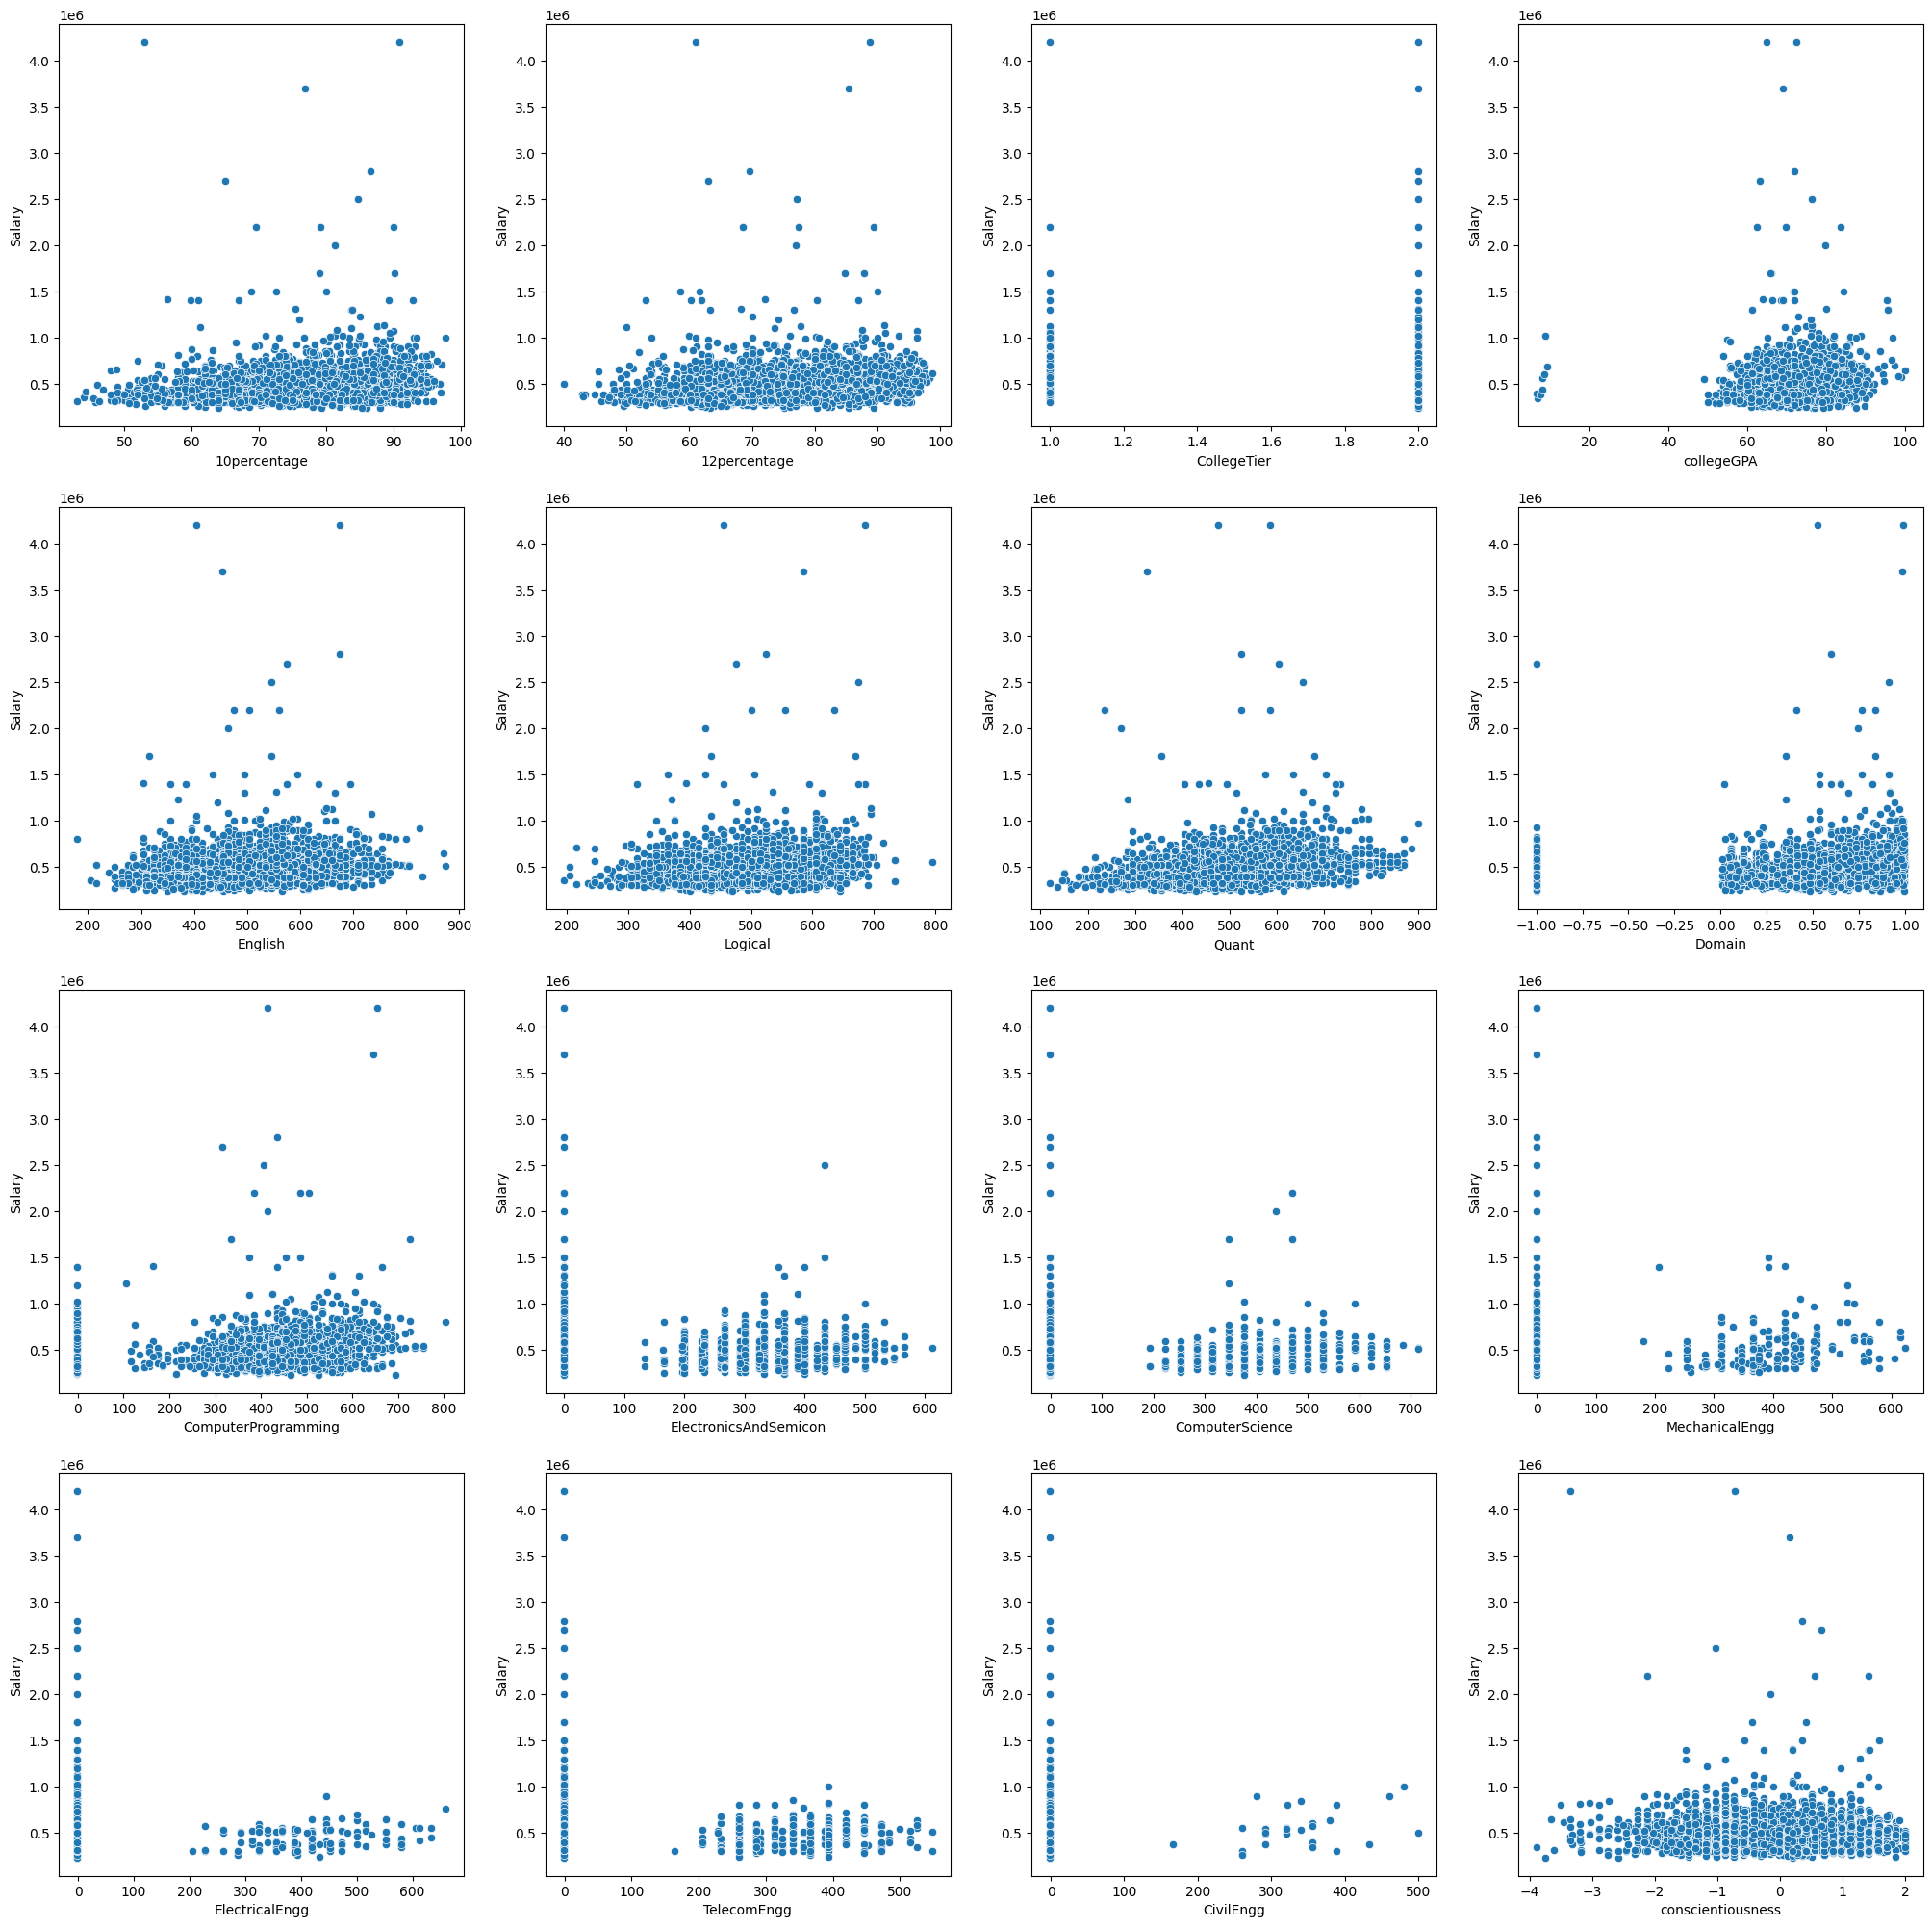

In [45]:
plt.figure(figsize=(25,25))

for i,col in enumerate(df.select_dtypes('number').columns[:-1]): 
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=col, y='Salary', data=df)
plt.show()

In [46]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

<Axes: xlabel='Degree', ylabel='Salary'>

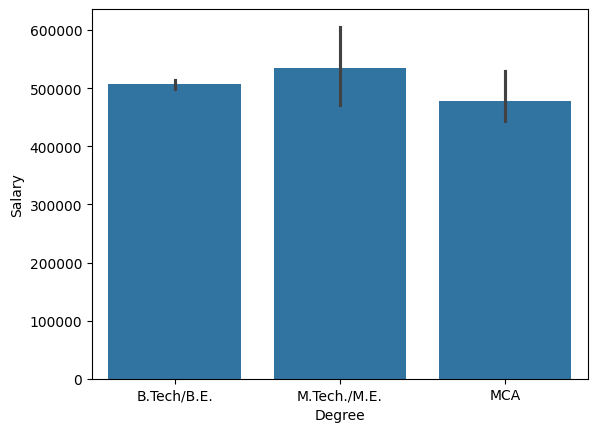

In [47]:
sns.barplot(data=df,x='Degree',y='Salary')

In [49]:
df.drop('Gender',axis=1,inplace=True)
df.columns

Index(['10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [51]:
df['Specialization'].value_counts()

Specialization
CS/IT                                          1679
electronics and communication engineering       670
mechanical engineering                          155
electronics and electrical engineering          148
electronics & telecommunications                 89
Others                                           65
electrical engineering                           63
electronics & instrumentation eng                24
instrumentation and control engineering          18
information science engineering                  18
electronics and instrumentation engineering      18
civil engineering                                15
electronics engineering                          13
biotechnology                                    12
other                                            10
Name: count, dtype: int64

In [52]:
# Replacing electronics and communication engineering and electronics & telecommunications with ECE
def group_specialization(x):
    if x in ['electronics and communication engineering', 'electronics & telecommunications']:
        return 'ECE'
    else:
        return x
    
df.Specialization=df.Specialization.apply(group_specialization)
df['Specialization'].value_counts()

Specialization
CS/IT                                          1679
ECE                                             759
mechanical engineering                          155
electronics and electrical engineering          148
Others                                           65
electrical engineering                           63
electronics & instrumentation eng                24
instrumentation and control engineering          18
information science engineering                  18
electronics and instrumentation engineering      18
civil engineering                                15
electronics engineering                          13
biotechnology                                    12
other                                            10
Name: count, dtype: int64

In [54]:
# grouping electronics and electrical engineering and electrical engineering with EE
def group_specialization1(x):
    if x in ['electronics and electrical engineering', 'electrical engineering']:
        return 'EE'
    else:
        return x

df.Specialization=df.Specialization.apply(group_specialization1)
df['Specialization'].value_counts()

Specialization
CS/IT                                          1679
ECE                                             759
EE                                              211
mechanical engineering                          155
Others                                           65
electronics & instrumentation eng                24
instrumentation and control engineering          18
information science engineering                  18
electronics and instrumentation engineering      18
civil engineering                                15
electronics engineering                          13
biotechnology                                    12
other                                            10
Name: count, dtype: int64

In [55]:
# grouping electronics & instrumentation eng and electronics and instrumentation engineering and instrumentation and control engineering with EIE
def group_specialization2(x):
    if x in ['electronics & instrumentation eng', 'electronics and instrumentation engineering','instrumentation and control engineering']:
        return 'EIE'
    else:
        return x

df.Specialization=df.Specialization.apply(group_specialization2)
df['Specialization'].value_counts()

Specialization
CS/IT                              1679
ECE                                 759
EE                                  211
mechanical engineering              155
Others                               65
EIE                                  60
information science engineering      18
civil engineering                    15
electronics engineering              13
biotechnology                        12
other                                10
Name: count, dtype: int64

<Axes: xlabel='Specialization', ylabel='Salary'>

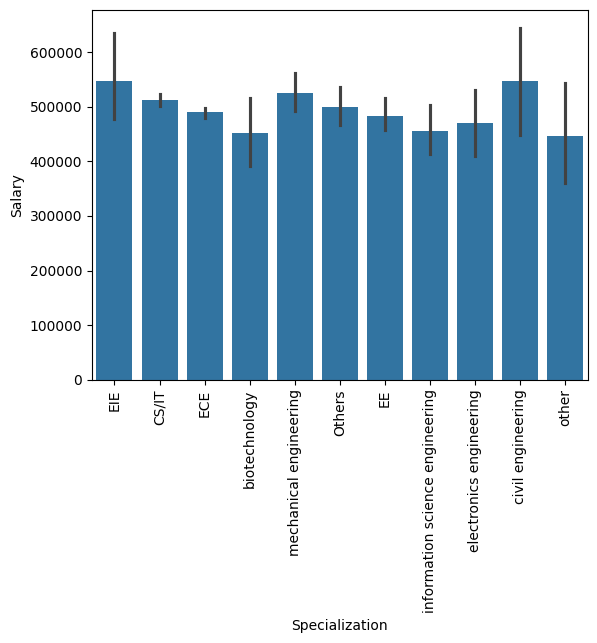

In [57]:
plt.xticks(rotation=90)
sns.barplot(data=df,x='Specialization',y='Salary')

In [58]:
df.to_csv('cleaned_data1.csv',index=False)